## Matrices summary

Let's summarize in one notebook all matrix-vector multiplications

(62, 63, 3)
(62, 62)
[[239 241 242 ... 243 242 243]
 [241 241 243 ... 242 242 242]
 [244 244 243 ... 243 242 242]
 ...
 [240 241 242 ... 239 241 243]
 [239 240 242 ... 241 242 244]
 [239 240 242 ... 242 242 244]]
['#efefef' '#f1f1f1' '#f2f2f2' ... '#f2f2f2' '#f2f2f2' '#f4f4f4']


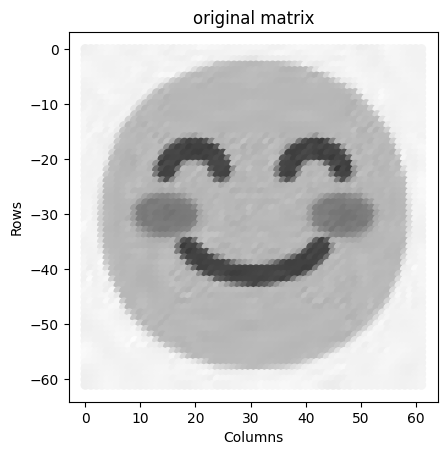

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Load the image
img = Image.open('images/02_Matrix/smiley.jpg')

# Convert the image to a NumPy array
IMG = np.array(img)
print(IMG.shape)

# make the A matrix squared by converting to black and white
IMG = IMG[:62,:62,1]
print(IMG.shape)
print(IMG)

coordinates = []
values = []
for x in range(62):
    for y in range(62):
        row = [x,y]
        coordinates.append(row)

coordinates = np.array(coordinates)
values = IMG.reshape(3844,).tolist()

# Generate colors ranging from #000000 to #FFFFFF
hex_colors = ['#' + format(i, '02x') * 3 for i in range(0, 256, 255 // 254)]

colors = np.array(hex_colors)[values]

print(colors)

rotate = np.array([[0,-1],[1,0]])
coordinates = coordinates@rotate

def roundAbs(matrix):
    return np.abs(np.rint(matrix))

def print_matrix(matrix, title='Matrix as Image'):
    fig, ax = plt.subplots(figsize=(4,4))
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()


def print_image(matrix, title='test'):
    fig, ax = plt.subplots()
    ax.scatter(matrix[:,0], matrix[:,1], c=colors)
    plt.title(title)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

A = coordinates

print_image(A, 'original matrix')

### Identity Matrix

$$I = \begin{vmatrix}1 & 0\\
0 & 1 \\
\end{vmatrix}$$


Leave the matrix or the vector intact after transformation: \
AI = A

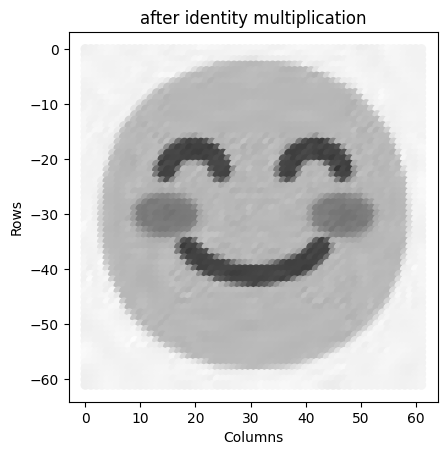

In [67]:
I = np.eye(A.shape[1])
res = A@I
print_image(res, 'after identity multiplication')

### Squared zero matrix

visually that mean scale to the origin like it was a black hole

[[0. 0.]
 [0. 0.]]


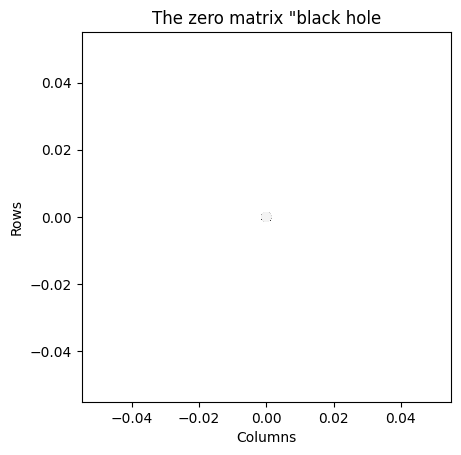

In [68]:
zeroM = np.zeros([2,2])
print(zeroM)

print_image(A@zeroM, 'The zero matrix "black hole')

### Scalar matrices

scale one or more axis by a scalar value
swap direction if the scalar value is negative

scale by 2 in both axis:
$$S = 2 . \begin{vmatrix}1 & 0 & 0\\
0 & 1 & 0 \\
0 & 0 & 1
\end{vmatrix}= \begin{vmatrix}2 & 0 & 0\\
0 & 2 & 0 \\
0 & 0 & 2
\end{vmatrix}$$


scale only x axis:
$$\begin{vmatrix}5 & 0 & 0\\
0 & 1 & 0 \\
0 & 0 & 1
\end{vmatrix}$$

[[2. 0.]
 [0. 2.]]


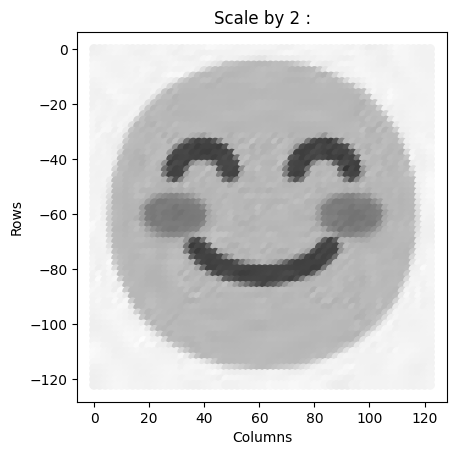

In [69]:
S = 2*I
print(S)
print_image(A@S, 'Scale by 2 :')

### Reflection matrix

- off by one [[k, 0],[1,0]] scale only by one axis
- negative off by one: swap direction
- reflection around the origin: [[-1,0],[0,-1]]

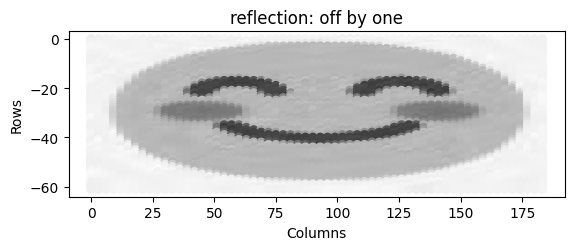

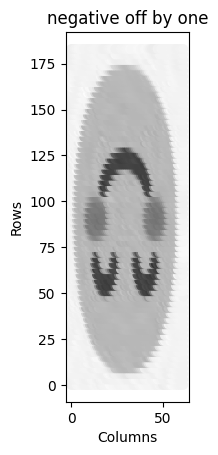

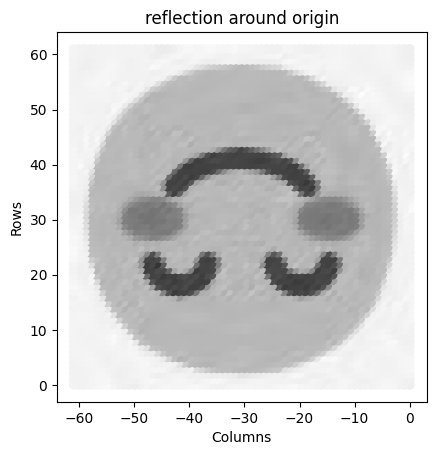

In [70]:
off_by_one = np.array([[3,0],[0,1]])
negative_off_by_one = np.array([[1,0],[0,-3]])
reflection_around_origin = np.array([[-1,0],[0,-1]])


print_image(A@off_by_one, 'reflection: off by one')
print_image(A@negative_off_by_one, 'negative off by one')
print_image(A@reflection_around_origin, 'reflection around origin')

### Diagonal matrix (preserve shape, but change area)

Example = 
scale only x axis:
$$\begin{vmatrix}3 & 0\\
0 & 2 
\end{vmatrix}$$

scale x axis by 3 and scale y axis by 2

whenever there is a diagonal matrix, one can always decompose it by a sequence of transformations
$$\begin{vmatrix}3 & 0\\
0 & 1 
\end{vmatrix}.\begin{vmatrix}1 & 0\\
0 & 1 
\end{vmatrix} = \begin{vmatrix}3 & 0\\
0 & 2 
\end{vmatrix}$$

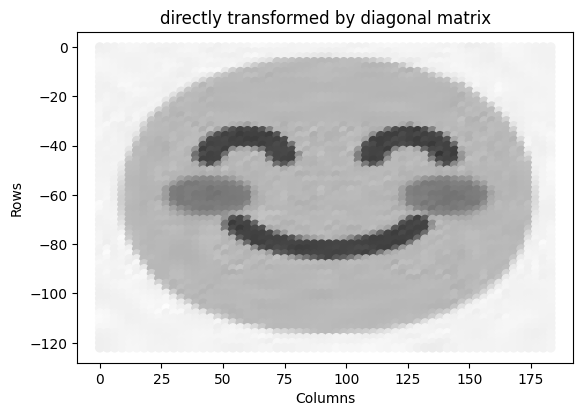

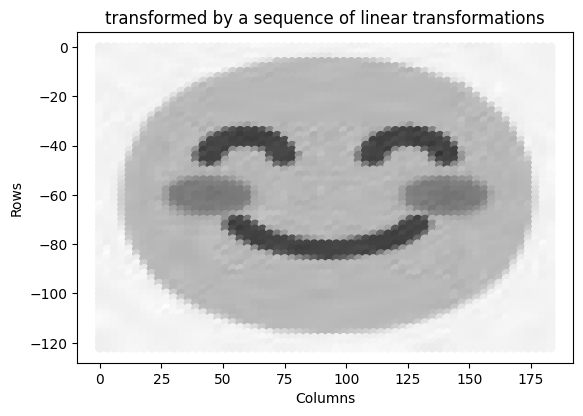

In [71]:
diag = np.array([[3,0],[0,2]])

transf1 = np.array([[3,0],[0,1]])
transf2 = np.array([[1,0],[0,2]])

print_image(A@diag, 'directly transformed by diagonal matrix')
print_image(A@transf1@transf2, 'transformed by a sequence of linear transformations')

## Shear matrix

Mean slanting the object (all the point above move in one direction, the under the axis on the opposite direction)
change shape but preserve area

x axis
$$\begin{vmatrix}1 & 0\\
-1 & 1 
\end{vmatrix}$$

$$\begin{vmatrix}1 & 0\\
1 & 1 
\end{vmatrix}$$

y axis:
$$\begin{vmatrix}1 & 1\\
0 & 1 
\end{vmatrix}$$

$$\begin{vmatrix}1 & -1\\
0 & 1 
\end{vmatrix}$$

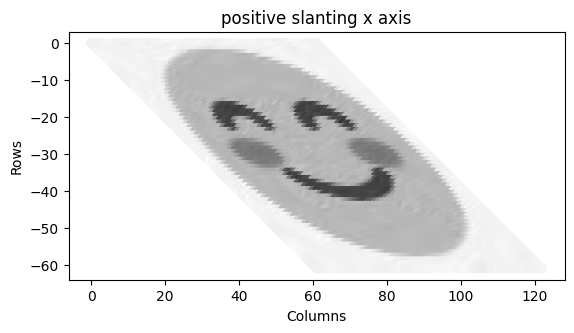

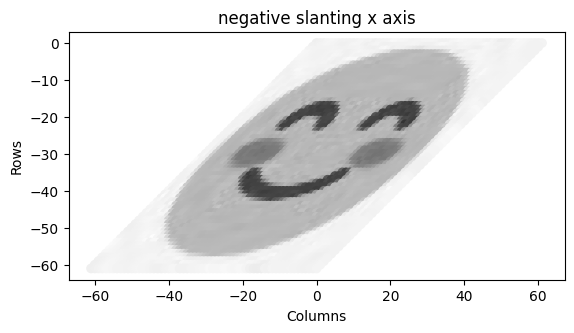

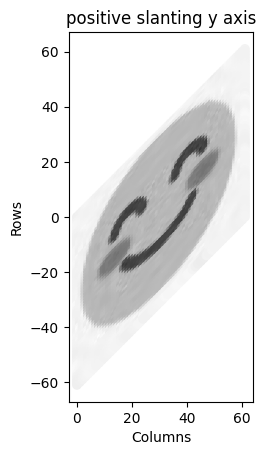

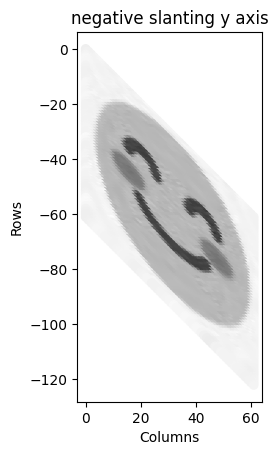

In [72]:
xaxis_1 = np.array([[1,0],[-1,1]])
xaxis_2 = np.array([[1,0],[1,1]])

yaxis_1 = np.array([[1,1],[0,1]])
yaxis_2 = np.array([[1,-1],[0,1]])

print_image(A@xaxis_1, 'positive slanting x axis')
print_image(A@xaxis_2, 'negative slanting x axis')
print_image(A@yaxis_1,'positive slanting y axis')
print_image(A@yaxis_2, 'negative slanting y axis')

### Orthogonal matrices

Orthogonal matrices are square matrices whose column are all unit vectors which are orthogonal within each other
An orthogonal matrix have as a result a perfect rotation without scaling

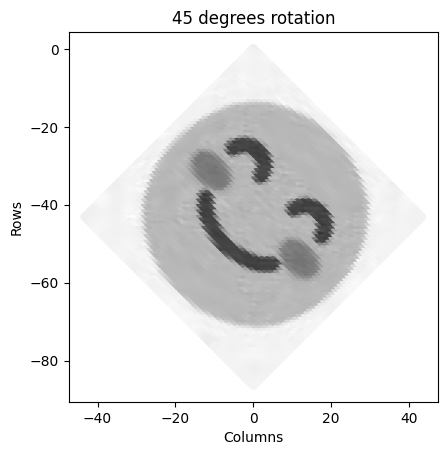

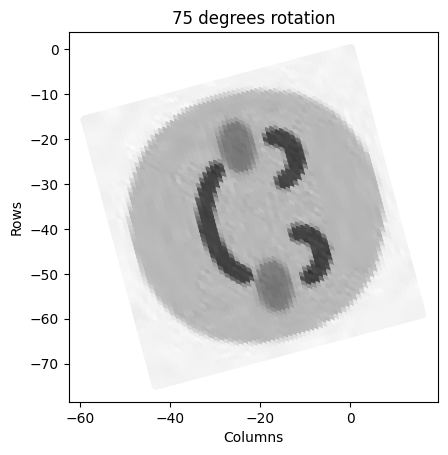

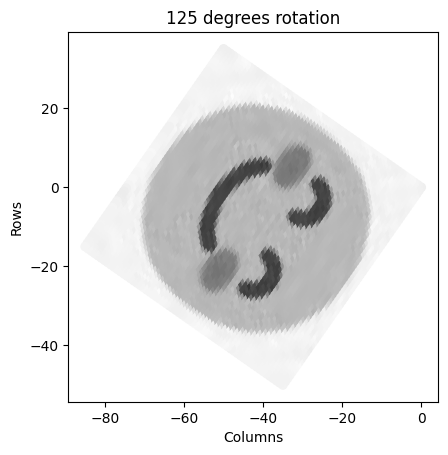

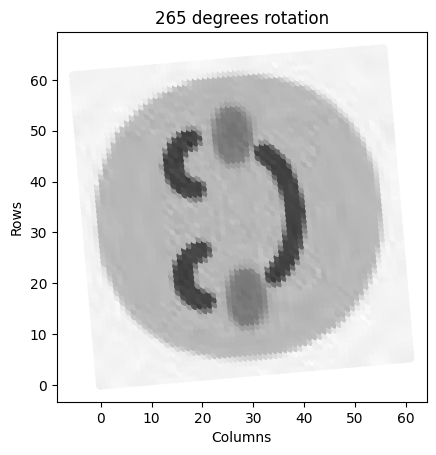

In [73]:
# Rotation Matrix
def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

# Example angles (for rotation matrices)
deg_45 = np.pi/(180/45)  # 45 degrees
deg_75 = np.pi/(180/75)
deg_125 = np.pi/(180/125)
deg_265 = np.pi/(180/265)

degrees_rot_45 = rotation_matrix(deg_45)
degrees_rot_75 = rotation_matrix(deg_75)
degrees_rot_125 = rotation_matrix(deg_125)
degrees_rot_265 = rotation_matrix(deg_265)

print_image(A@degrees_rot_45, '45 degrees rotation')
print_image(A@degrees_rot_75, '75 degrees rotation')
print_image(A@degrees_rot_125, '125 degrees rotation')
print_image(A@degrees_rot_265, '265 degrees rotation')

### Projection matrix

In 2D, a line is a subspace
In 3D, a plane is a subspace

after the projection transformation, every dot is compressed onto the subspace
The projection transformation bring a point to the closest one in the subspace

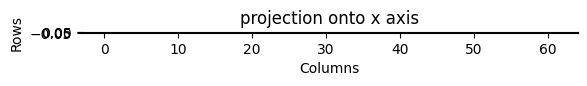

In [74]:
# Projection matrix for projecting onto the x-axis
x_projection = np.array([[1, 0],[0, 0]])

print_image(A@x_projection, 'projection onto x axis')






Inverse matrix
undo the transformation produced by a matrix multiplication

So that means that multiplying a vector by a matrix and then by the inverse matrix, result on the same vector
And also means that multiplying a matrix by its inverse result on the identity matrix